In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
from scipy.stats import linregress
import pandas as pd
from config import api_key

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [3]:
# Get latitude and temperature for cities
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.8534, 51.5085, 59.9127, 39.9075, 19.0144, 14.6042, 40.7143, 47.6062, 32.7668, 25.0478]
The temperature information received is: [9.02, 7.33, 5.99, 19.97, 28, 29.32, 18.05, 19.82, 9.32, 25.97]


In [4]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.8534,9.02
1,London,51.5085,7.33
2,Oslo,59.9127,5.99
3,Beijing,39.9075,19.97
4,Mumbai,19.0144,28.00
5,Manila,14.6042,29.32
6,New York,40.7143,18.05
7,Seattle,47.6062,19.82
8,Dallas,32.7668,9.32
9,Taipei,25.0478,25.97


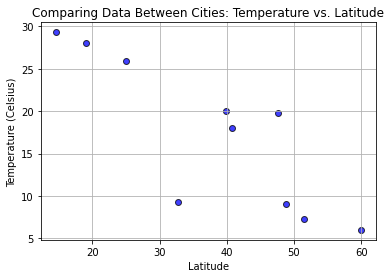

In [5]:
# Create a Scatter Plot for temperature vs. latitude
plt.scatter(weather_data['lat'], weather_data['temp'], marker="o", 
            facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Comparing Data Between Cities: Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
plt.grid(True)
plt.show()

In [6]:
# Perform a linear regression on temperature vs. latitude
x_values = weather_data['lat']
y_values = weather_data['temp']

# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

In [7]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

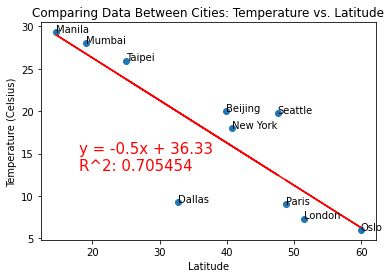

In [8]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(18,15),fontsize=15,color="red")
plt.title("Comparing Data Between Cities: Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
for i, city in enumerate(cities):
    plt.annotate(city, (x_values[i], y_values[i]),fontsize=10)

# Print r square value
plt.annotate(f'R^2: {(rvalue**2).round(6)}',(18,13),fontsize=15,color="red")

# Show plot
plt.show()

In [9]:
# Use the line equation to predict the temperature for Florence at a latitude of 43.77 degrees
florencetemp = round(slope*43.77 + intercept,2)
print(f"The predicted temperature in Florence is: {florencetemp}")

The predicted temperature in Florence is: 14.38


In [10]:
# Use API to determine actual temperature
query_city = 'Florence'
response1 = requests.get(query_url + query_city).json()
print(f"The actual temperature in Florence is: {response['main']['temp']}")

The actual temperature in Florence is: 25.97
